In [1]:
# Funcion para correr .cpp
import numpy as np
import matplotlib.pyplot as plt
JACOBI_SUM = "../src/jacobi_sum"
JACOBI_MAT = "../src/jacobi_mat"
GS_SUM = "../src/gs_sum"
GS_MAT = "../src/gs_mat"
MAIN = "../src/main"

ENTRADA = "entrada.txt"
SALIDA = "salida.txt"
ERRORS = "errores.txt"
TIEMPO = "tiempos.txt"
ITERS = "iters.txt"

def run(method ,iter, error=None): 
    if error is None:
        !{method} {iter}
    else:
        !{method} {iter} {error}

In [2]:
def entrada_writer(A, b, x_real):
    """
    rows columns
    a_11 a_12 ... a_1n b_1
    a_21 a_22 ... a_2n b_2
    ...
    a_n1 a_n2 ... a_nn b_n
    b_1 b_2 ... b_n
    x_1 x_2 ... x_n
    """
    n = A.shape[0]
    with open(ENTRADA, "w") as f:
        f.write(f"{n} {n}\n")
        for i in range(n):
            for j in range(n):
                f.write(f"{A[i][j]} ")
            f.write(f"\n")
        for i in range(n):
            f.write(f"{b[i]} ")
        f.write(f"\n")
        for i in range(n):
            f.write(f"{x_real[i]} ")


def salida_reader():
    with open(SALIDA, "r") as f:
        vector = f.readline().split()
        n = len(vector)
        x = np.zeros(n)
        for i in range(n):
            x[i] = float(vector[i].strip())
    return x


def errores_reader():
    with open(ERRORS, "r") as f:
        vector = f.readline().split()
        n = len(vector)
        e = np.zeros(n)
        for i in range(n):
            e[i] = float(vector[i])
    return e

def tiempos_reader():
    with open(TIEMPO, "r") as f:
        t = float(f.readline())
    return t

def iters_reader():
    with open(ITERS, "r") as f:
        t = int(f.readline())
    return t

In [3]:
def generate_strictly_diagonal_dominant_matrix(n):
    np.random.seed(48564)
    # #A is a random matrix with numbers beetwen 10 and 20
    # A = np.random.rand(n, n)

    # for i in range(n):
    #     row_sum = np.sum(np.abs(A[i]))
    #     A[i][i] = row_sum + 0.1
    
    # return A
    A = np.random.randint(-20, 20, (n, n))
    suma = np.sum(np.abs(A), axis=1)
    A += np.diag(suma)
    return A

def generate_hilberts_matrix(n):
    np.random.seed(48564)
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            A[i][j] = 1 / (i + j + 1)
    return A

def generate_normal_matrix(n):
    np.random.seed(48564)
    return np.random.rand(n, n)

def generate_tridiagonal(n):
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i == j:
                A[i][j] = np.random.randint(1, 10)
            elif i == j + 1 or i == j - 1:
                A[i][j] = np.random.randint(1, 10)
    return A

def generar_matriz_spd(n):
    A = np.random.rand(n, n) 
    A = np.dot(A, A.T)  
    A += np.eye(n)  
    return A




TIEMPOS EDD

[0.41578998 0.43486982 0.31301691 0.3319486  0.72214143 0.17679125
 0.66472987 0.35105185]
Corriendo ../src/gs_sum con n=8
Corrida 1
iteración 0
iteración 1
iteración 2
iteración 3
iteración 4
iteración 5
iteración 6
iteración 7
iteración 8
iteración 9
iteración 10
iteración 11
iteración 12
iteración 13
iteración 14
iteración 15
iteración 16
iteración 17
iteración 18
iteración 19
iteración 20
iteración 21
iteración 22
iteración 23
iteración 24
iteración 25
iteración 26
iteración 27
iteración 28
iteración 29
iteración 30
iteración 31
iteración 32
iteración 33
iteración 34
iteración 35
iteración 36
iteración 37
iteración 38
iteración 39
iteración 40
iteración 41
iteración 42
iteración 43
iteración 44
iteración 45
iteración 46
iteración 47
iteración 48
iteración 49
iteración 50
iteración 51
iteración 52
iteración 53
iteración 54
iteración 55
iteración 56
iteración 57
iteración 58
iteración 59
iteración 60
iteración 61
iteración 62
iteración 63
iteración 64
iteración 65
iteración 66
iterac

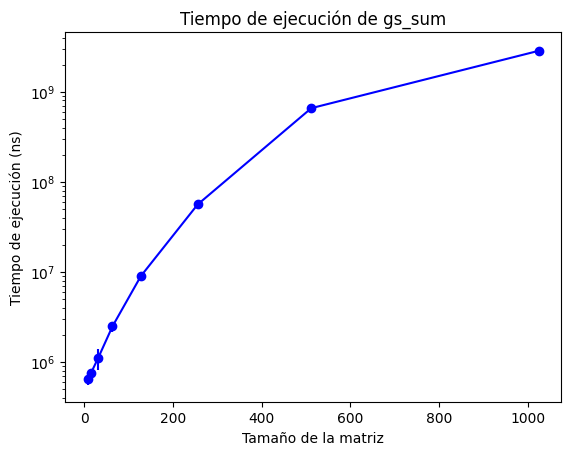

In [6]:
method = GS_SUM
np.random.seed(48564)
n = 8
info ={}
for i in range(8):
    A = generate_strictly_diagonal_dominant_matrix(n)
    x_real = np.random.rand(n)
    print(x_real)
    b = np.matmul(A, x_real)
    entrada_writer(A, b, x_real)
    tiempos = []
    print(f"Corriendo {method} con n={n}")
    for i in range(10):
        print(f"Corrida {i+1}")
        run(method=method, iter=500)
        tiempos.append(tiempos_reader())
    mean = np.mean(tiempos)
    std = np.std(tiempos)
    info[n] = [mean, std]
    n = n*2


mat_size = info.keys()
mat_mean = [info[i][0] for i in info.keys()]
mat_std = [info[i][1] for i in info.keys()]
print(mat_size)
print(mat_mean)
print(mat_std)
plt.errorbar(mat_size, mat_mean, yerr=mat_std, fmt='-bo')
plt.xlabel("Tamaño de la matriz")
plt.ylabel("Tiempo de ejecución (ns)")
plt.yscale("log")
plt.title(f"Tiempo de ejecución de {method.split('/')[-1]}")
plt.show()

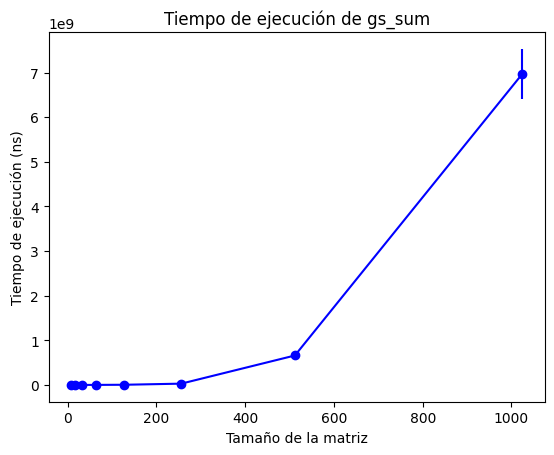

In [7]:
mat_size = [8, 16, 32, 64, 128, 256, 512, 1024]
mat_mean = [50539.3, 56589.8, 89930.4, 552606.0, 3734648.2, 28659508.9, 659597935.5, 6966710563.7]
mat_std = [42197.756810167055, 20473.603873280346, 21516.194190423175, 39515.51100770431, 257770.75096209033, 2766838.5215696795, 29864108.71750743, 565271511.5188582]
plt.errorbar(mat_size, mat_mean, yerr=mat_std, fmt='-bo')
plt.xlabel("Tamaño de la matriz")
plt.ylabel("Tiempo de ejecución (ns)")

plt.title(f"Tiempo de ejecución de {method.split('/')[-1]}")
plt.show()

In [ ]:
mat_mean = [38619.3, 47371.2, 81944.5, 256295.6, 1413373.7, 7676883.2, 55385738.1, 408690483.3]
mat_std = [13199.84278732137, 13426.151777780555, 21797.435079614297, 40061.13816705661, 177206.89700180973, 293005.7209259915, 647083.0815052191, 11459856.426426075]
mat_mean_sum = [34760.9, 62795.3, 108316.5, 862316.0, 41156138.7, 444327804.6, 5060776906.5, 40994020022.3]
mat_std_sum = [9341.682069627503, 14560.653090091804, 21807.33972427632, 41481.691465030686, 3083670.193508315, 16974660.91756805, 336296892.47135055, 1575584472.7307732]
plt.errorbar(mat_size, mat_mean, yerr=mat_std, fmt='-bo')
plt.errorbar(mat_size, mat_mean_sum, yerr=mat_std_sum, fmt='-ro')
plt.xlabel("Tamaño de la matriz")
plt.ylabel("Tiempo de ejecución (ns)")
plt.yscale("log")
plt.title(f"Tiempo de ejecución de GS Sum vs GS Mat")
plt.show()

In [ ]:
#JACOBI MAT VS JACOBI SUM
mat_mean = [47021.7, 46413.1, 79870.4, 249073.8, 1397232.0, 7954417.1, 57995022.3, 417789472.9]
mat_std = [10156.358304530222, 6601.679626428414, 9089.275715919284, 19028.77204025525, 140505.54477528634, 410808.47285723063, 1830090.1741675492, 6904504.796453999]
mat_mean_sum = [50539.3, 56589.8, 89930.4, 552606.0, 3734648.2, 28659508.9, 659597935.5, 6966710563.7]
mat_std_sum = [42197.756810167055, 20473.603873280346, 21516.194190423175, 39515.51100770431, 257770.75096209033, 2766838.5215696795, 29864108.71750743, 565271511.5188582]

plt.errorbar(mat_size, mat_mean, yerr=mat_std, fmt='-bo')
plt.errorbar(mat_size, mat_mean_sum, yerr=mat_std_sum, fmt='-ro')
plt.legend(["Jacobi Mat", "Jacobi Sum"])
plt.xlabel("Tamaño de la matriz")
plt.ylabel("Tiempo de ejecución (ns)")
plt.yscale("log")
plt.title(f"Tiempo de ejecución de Jacobi Mat vs Jacobi Sum")
plt.show()

TIEMPOS EDD LU SOLVER

In [ ]:
method = JACOBI_MAT
np.random.seed(48564)
n = 8
info ={}
for i in range(8):
    A = generate_strictly_diagonal_dominant_matrix(n)
    x_real = np.random.rand(n)
    print(x_real)
    b = np.matmul(A, x_real)
    entrada_writer(A, b, x_real)
    tiempos = []
    print(f"Corriendo {method} con n={n}")
    for i in range(10):
        print(f"Corrida {i+1}")
        run(method=method, iter=500)
        tiempos.append(tiempos_reader())
    mean = np.mean(tiempos)
    std = np.std(tiempos)
    info[n] = [mean, std]
    n = n*2


mat_size = info.keys()
mat_mean = [info[i][0] for i in info.keys()]
mat_std = [info[i][1] for i in info.keys()]
print(mat_size)
print(mat_mean)
print(mat_std)
plt.errorbar(mat_size, mat_mean, yerr=mat_std, fmt='-bo')
plt.xlabel("Tamaño de la matriz")
plt.ylabel("Tiempo de ejecución (ns)")
plt.yscale("log")
plt.title(f"Tiempo de ejecución de {method.split('/')[-1]}")
plt.show()

In [ ]:
LU_MEAN = [5333.4, 6684.5, 30724.5, 53228.0, 226286.7, 1284633.1, 8518863.3, 60978312.6]
LU_STD = [1930.103323659125, 365.76857437456266, 26015.80603882955, 8123.605948099649, 23018.128351584102, 86423.99731492405, 280750.5008188053, 903176.6945382503]
mat_mean_GS = [38619.3, 47371.2, 81944.5, 256295.6, 1413373.7, 7676883.2, 55385738.1, 408690483.3]
mat_std_GS = [13199.84278732137, 13426.151777780555, 21797.435079614297, 40061.13816705661, 177206.89700180973, 293005.7209259915, 647083.0815052191, 11459856.426426075]
mat_mean_JACOBI = [47021.7, 46413.1, 79870.4, 249073.8, 1397232.0, 7954417.1, 57995022.3, 417789472.9]
mat_std_JACOBI = [10156.358304530222, 6601.679626428414, 9089.275715919284, 19028.77204025525, 140505.54477528634, 410808.47285723063, 1830090.1741675492, 6904504.796453999]
plt.errorbar(mat_size, LU_MEAN, yerr=LU_STD, fmt='-bo')
plt.errorbar(mat_size, mat_mean_GS, yerr=mat_std_GS, fmt='-ro')
plt.errorbar(mat_size, mat_mean_JACOBI, yerr=mat_std_JACOBI, fmt='-go')
plt.yscale("log")
plt.legend(["LU", "GS", "JACOBI"])
plt.xlabel("Tamaño de la matriz")
plt.ylabel("Tiempo de ejecución (ns)")
plt.title(f"Tiempo de ejecución de los 3 metodos matriciales")
plt.show()


ERROR NORMALES

Corriendo ../src/gs_sum con n=500
iteración 0
iteración 1
iteración 2
iteración 3


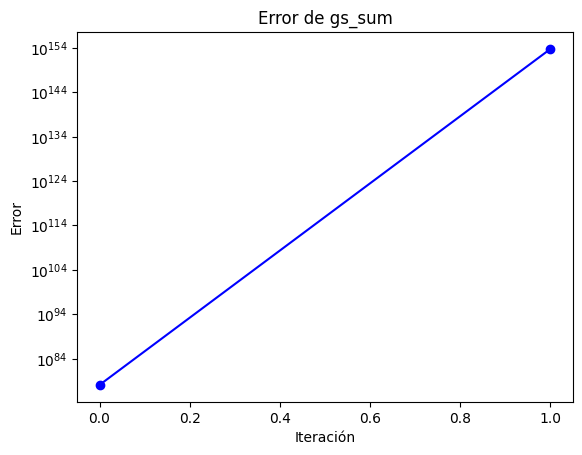

In [22]:
method = GS_SUM
np.random.seed(48564)
n = 500
A = generate_normal_matrix(n)
x_real = np.random.rand(n)
b = np.matmul(A, x_real)
entrada_writer(A, b, x_real)
tiempos = []
print(f"Corriendo {method} con n={n}")
run(method=method, iter=1000, error="true")
err = errores_reader()

plt.plot([i for i in range(len(err))], err, '-bo')
plt.xlabel("Iteración")
plt.ylabel("Error")
plt.yscale("log")
plt.title(f"Error de {method.split('/')[-1]}")
plt.show()

ERRORES EDD

Corriendo ../src/gs_sum con n=500
iteración 0
iteración 1
iteración 2
iteración 3
iteración 4
iteración 5


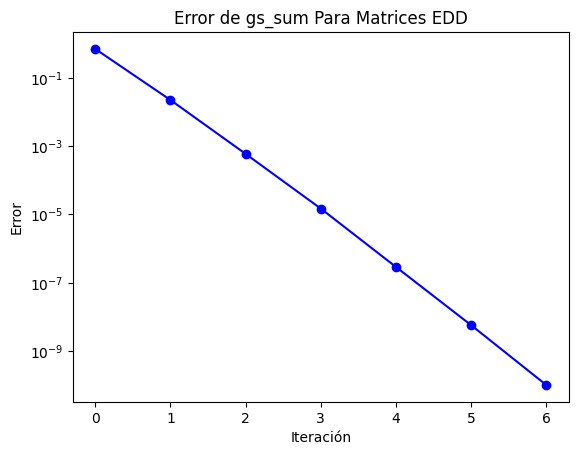

In [23]:
method = GS_SUM
np.random.seed(48564)
n = 500
A = generate_strictly_diagonal_dominant_matrix(n)
x_real = np.random.rand(n)
b = np.matmul(A, x_real)
entrada_writer(A, b, x_real)
tiempos = []
print(f"Corriendo {method} con n={n}")
run(method=method, iter=1000, error="true")
err = errores_reader()

plt.plot([i for i in range(len(err))], err, '-bo')
plt.xlabel("Iteración")
plt.ylabel("Error")
plt.yscale("log")
plt.title(f"Error de {method.split('/')[-1]} Para Matrices EDD")
plt.show()

ERROR DE JACOBI AJUSTADO

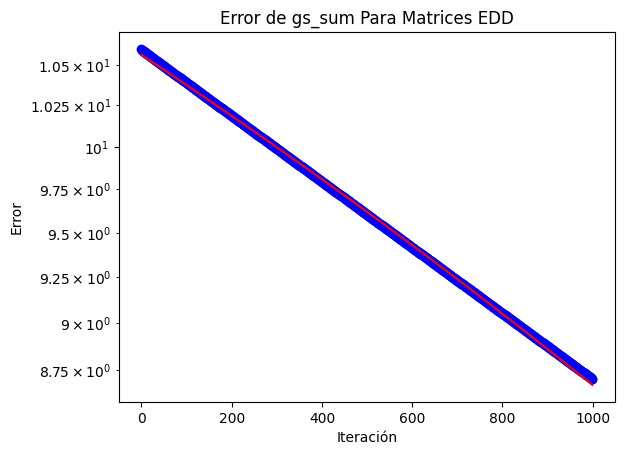

In [24]:
y ="10.5995 10.5917 10.5897 10.5876 10.5855 10.5834 10.5813 10.5793 10.5772 10.5751  10.573 10.5709 10.5689 10.5668 10.5647 10.5626 10.5606 10.5585 10.5564 10.5543 10.5523 10.5502 10.5481  10.546  10.544 10.5419 10.5398 10.5378 10.5357 10.5336 10.5315 10.5295 10.5274 10.5253 10.5233 10.5212 10.5191 10.5171  10.515 10.5129 10.5109 10.5088 10.5067 10.5047 10.5026 10.5005 10.4985 10.4964 10.4944 10.4923 10.4902 10.4882 10.4861  10.484  10.482 10.4799 10.4779 10.4758 10.4737 10.4717 10.4696 10.4676 10.4655 10.4635 10.4614 10.4593 10.4573 10.4552 10.4532 10.4511 10.4491  10.447  10.445 10.4429 10.4409 10.4388 10.4368 10.4347 10.4327 10.4306 10.4286 10.4265 10.4245 10.4224 10.4204 10.4183 10.4163 10.4142 10.4122 10.4101 10.4081  10.406  10.404 10.4019 10.3999 10.3979 10.3958 10.3938 10.3917 10.3897 10.3876 10.3856 10.3836 10.3815 10.3795 10.3774 10.3754 10.3734 10.3713 10.3693 10.3672 10.3652 10.3632 10.3611 10.3591 10.3571  10.355  10.353  10.351 10.3489 10.3469 10.3449 10.3428 10.3408 10.3388 10.3367 10.3347 10.3327 10.3306 10.3286 10.3266 10.3245 10.3225 10.3205 10.3185 10.3164 10.3144 10.3124 10.3103 10.3083 10.3063 10.3043 10.3022 10.3002 10.2982 10.2962 10.2941 10.2921 10.2901 10.2881 10.2861  10.284  10.282   10.28  10.278  10.276 10.2739 10.2719 10.2699 10.2679 10.2659 10.2638 10.2618 10.2598 10.2578 10.2558 10.2538 10.2517 10.2497 10.2477 10.2457 10.2437 10.2417 10.2397 10.2377 10.2356 10.2336 10.2316 10.2296 10.2276 10.2256 10.2236 10.2216 10.2196 10.2176 10.2155 10.2135 10.2115 10.2095 10.2075 10.2055 10.2035 10.2015 10.1995 10.1975 10.1955 10.1935 10.1915 10.1895 10.1875 10.1855 10.1835 10.1815 10.1795 10.1775 10.1755 10.1735 10.1715 10.1695 10.1675 10.1655 10.1635 10.1615 10.1595 10.1575 10.1555 10.1535 10.1515 10.1495 10.1475 10.1455 10.1435 10.1415 10.1395 10.1375 10.1355 10.1336 10.1316 10.1296 10.1276 10.1256 10.1236 10.1216 10.1196 10.1176 10.1156 10.1137 10.1117 10.1097 10.1077 10.1057 10.1037 10.1017 10.0998 10.0978 10.0958 10.0938 10.0918 10.0898 10.0878 10.0859 10.0839 10.0819 10.0799 10.0779  10.076  10.074  10.072   10.07  10.068 10.0661 10.0641 10.0621 10.0601 10.0581 10.0562 10.0542 10.0522 10.0502 10.0483 10.0463 10.0443 10.0423 10.0404 10.0384 10.0364 10.0345 10.0325 10.0305 10.0285 10.0266 10.0246 10.0226 10.0207 10.0187 10.0167 10.0148 10.0128 10.0108 10.0088 10.0069 10.0049 10.0029  10.001 9.99902 9.99705 9.99509 9.99312 9.99116  9.9892 9.98723 9.98527 9.98331 9.98135 9.97938 9.97742 9.97546  9.9735 9.97154 9.96958 9.96762 9.96566  9.9637 9.96175 9.95979 9.95783 9.95587 9.95392 9.95196 9.95001 9.94805  9.9461 9.94414 9.94219 9.94023 9.93828 9.93633 9.93437 9.93242 9.93047 9.92852 9.92657 9.92462 9.92266 9.92071 9.91876 9.91682 9.91487 9.91292 9.91097 9.90902 9.90707 9.90513 9.90318 9.90123 9.89929 9.89734  9.8954 9.89345 9.89151 9.88957 9.88762 9.88568 9.88374 9.88179 9.87985 9.87791 9.87597 9.87403 9.87209 9.87015 9.86821 9.86627 9.86433 9.86239 9.86045 9.85851 9.85658 9.85464  9.8527 9.85077 9.84883  9.8469 9.84496 9.84303 9.84109 9.83916 9.83722 9.83529 9.83336 9.83142 9.82949 9.82756 9.82563  9.8237 9.82177 9.81984 9.81791 9.81598 9.81405 9.81212 9.81019 9.80826 9.80634 9.80441 9.80248 9.80056 9.79863  9.7967 9.79478 9.79285 9.79093   9.789 9.78708 9.78516 9.78323 9.78131 9.77939 9.77747 9.77555 9.77363  9.7717 9.76978 9.76786 9.76594 9.76402 9.76211 9.76019 9.75827 9.75635 9.75443 9.75252  9.7506 9.74868 9.74677 9.74485 9.74294 9.74102 9.73911 9.73719 9.73528 9.73337 9.73145 9.72954 9.72763 9.72572 9.72381  9.7219 9.71999 9.71808 9.71617 9.71426 9.71235 9.71044 9.70853 9.70662 9.70471 9.70281  9.7009 9.69899 9.69709 9.69518 9.69328 9.69137 9.68947 9.68756 9.68566 9.68376 9.68185 9.67995 9.67805 9.67615 9.67424 9.67234 9.67044 9.66854 9.66664 9.66474 9.66284 9.66094 9.65904 9.65715 9.65525 9.65335 9.65145 9.64956 9.64766 9.64576 9.64387 9.64197 9.64008 9.63818 9.63629  9.6344  9.6325 9.63061 9.62872 9.62682 9.62493 9.62304 9.62115 9.61926 9.61737 9.61548 9.61359  9.6117 9.60981 9.60792 9.60603 9.60415 9.60226 9.60037 9.59848  9.5966 9.59471 9.59283 9.59094 9.58906 9.58717 9.58529  9.5834 9.58152 9.57964 9.57775 9.57587 9.57399 9.57211 9.57023 9.56835 9.56647 9.56459 9.56271 9.56083 9.55895 9.55707 9.55519 9.55331 9.55144 9.54956 9.54768 9.54581 9.54393 9.54205 9.54018  9.5383 9.53643 9.53456 9.53268 9.53081 9.52894 9.52706 9.52519 9.52332 9.52145 9.51958  9.5177 9.51583 9.51396 9.51209 9.51022 9.50836 9.50649 9.50462 9.50275 9.50088 9.49902 9.49715 9.49528 9.49342 9.49155 9.48969 9.48782 9.48596 9.48409 9.48223 9.48036  9.4785 9.47664 9.47478 9.47291 9.47105 9.46919 9.46733 9.46547 9.46361 9.46175 9.45989 9.45803 9.45617 9.45431 9.45246  9.4506 9.44874 9.44688 9.44503 9.44317 9.44132 9.43946  9.4376 9.43575  9.4339 9.43204 9.43019 9.42833 9.42648 9.42463 9.42278 9.42093 9.41907 9.41722 9.41537 9.41352 9.41167 9.40982 9.40797 9.40612 9.40427 9.40243 9.40058 9.39873 9.39688 9.39504 9.39319 9.39135  9.3895 9.38765 9.38581 9.38396 9.38212 9.38028 9.37843 9.37659 9.37475  9.3729 9.37106 9.36922 9.36738 9.36554  9.3637 9.36186 9.36002 9.35818 9.35634  9.3545 9.35266 9.35082 9.34899 9.34715 9.34531 9.34348 9.34164  9.3398 9.33797 9.33613  9.3343 9.33246 9.33063  9.3288 9.32696 9.32513  9.3233 9.32146 9.31963  9.3178 9.31597 9.31414 9.31231 9.31048 9.30865 9.30682 9.30499 9.30316 9.30133 9.29951 9.29768 9.29585 9.29402  9.2922 9.29037 9.28855 9.28672 9.28489 9.28307 9.28125 9.27942  9.2776 9.27577 9.27395 9.27213 9.27031 9.26849 9.26666 9.26484 9.26302  9.2612 9.25938 9.25756 9.25574 9.25392  9.2521 9.25029 9.24847 9.24665 9.24483 9.24302  9.2412 9.23938 9.23757 9.23575 9.23394 9.23212 9.23031 9.22849 9.22668 9.22487 9.22305 9.22124 9.21943 9.21762 9.21581   9.214 9.21218 9.21037 9.20856 9.20675 9.20494 9.20314 9.20133 9.19952 9.19771  9.1959  9.1941 9.19229 9.19048 9.18868 9.18687 9.18507 9.18326 9.18146 9.17965 9.17785 9.17604 9.17424 9.17244 9.17063 9.16883 9.16703 9.16523 9.16343 9.16163 9.15983 9.15803 9.15623 9.15443 9.15263 9.15083 9.14903 9.14723 9.14543 9.14364 9.14184 9.14004 9.13825 9.13645 9.13466 9.13286 9.13107 9.12927 9.12748 9.12568 9.12389  9.1221  9.1203 9.11851 9.11672 9.11493 9.11314 9.11135 9.10956 9.10776 9.10597 9.10419  9.1024 9.10061 9.09882 9.09703 9.09524 9.09346 9.09167 9.08988 9.08809 9.08631 9.08452 9.08274 9.08095 9.07917 9.07738  9.0756 9.07382 9.07203 9.07025 9.06847 9.06669  9.0649 9.06312 9.06134 9.05956 9.05778   9.056 9.05422 9.05244 9.05066 9.04888  9.0471 9.04533 9.04355 9.04177 9.03999 9.03822 9.03644 9.03467 9.03289 9.03111 9.02934 9.02757 9.02579 9.02402 9.02224 9.02047  9.0187 9.01693 9.01515 9.01338 9.01161 9.00984 9.00807  9.0063 9.00453 9.00276 9.00099 8.99922 8.99745 8.99568 8.99392 8.99215 8.99038 8.98861 8.98685 8.98508 8.98332 8.98155 8.97979 8.97802 8.97626 8.97449 8.97273 8.97097  8.9692 8.96744 8.96568 8.96391 8.96215 8.96039 8.95863 8.95687 8.95511 8.95335 8.95159 8.94983 8.94807 8.94631 8.94456  8.9428 8.94104 8.93928 8.93753 8.93577 8.93401 8.93226  8.9305 8.92875 8.92699 8.92524 8.92348 8.92173 8.91998 8.91822 8.91647 8.91472 8.91297 8.91122 8.90946 8.90771 8.90596 8.90421 8.90246 8.90071 8.89896 8.89722 8.89547 8.89372 8.89197 8.89022 8.88848 8.88673 8.88498 8.88324 8.88149 8.87975   8.878 8.87626 8.87451 8.87277 8.87102 8.86928 8.86754 8.86579 8.86405 8.86231 8.86057 8.85883 8.85709 8.85534  8.8536 8.85186 8.85012 8.84839 8.84665 8.84491 8.84317 8.84143 8.83969 8.83796 8.83622 8.83448 8.83275 8.83101 8.82928 8.82754 8.82581 8.82407 8.82234  8.8206 8.81887 8.81714  8.8154 8.81367 8.81194 8.81021 8.80848 8.80674 8.80501 8.80328 8.80155 8.79982 8.79809 8.79637 8.79464 8.79291 8.79118 8.78945 8.78773   8.786 8.78427 8.78255 8.78082 8.77909 8.77737 8.77564 8.77392 8.77219 8.77047 8.76875 8.76702  8.7653 8.76358 8.76186 8.76013 8.75841 8.75669 8.75497 8.75325 8.75153 8.74981 8.74809 8.74637 8.74465 8.74293 8.74121  8.7395 8.73778 8.73606 8.73435 8.73263 8.73091  8.7292 8.72748 8.72577 8.72405 8.72234 8.72062 8.71891 8.71719 8.71548 8.71377 8.71206 8.71034 8.70863 8.70692 8.70521"
y = y.split()
y = [float(i) for i in y]
x= [i for i in range(len(y))]
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '-bo')
plt.plot(x, m*np.array(x) + b, '-r')
plt.xlabel("Iteración")
plt.ylabel("Error")
plt.yscale("log")
plt.title(f"Error de {method.split('/')[-1]} Para Matrices EDD")
plt.show()


ERROR MATRICES EDD

[0.41578998 0.43486982 0.31301691 0.3319486  0.72214143 0.17679125
 0.66472987 0.35105185]
Corriendo ../src/jacobi_mat con n=8
iteración 0
iteración 1
iteración 2
iteración 3
iteración 4
iteración 5
iteración 6
iteración 7
iteración 8
iteración 9
iteración 10
iteración 11
iteración 12
iteración 13
iteración 14
iteración 15
iteración 16
iteración 17
iteración 18
iteración 19
iteración 20
iteración 21
iteración 22
iteración 23
iteración 24
iteración 25
[0.41578998 0.43486982 0.31301691 0.3319486  0.72214143 0.17679125
 0.66472987 0.35105185]
[0.34447623 0.13329893 0.2343162  0.55729162 0.35482028 0.02334333
 0.90129461 0.27975746 0.57883872 0.36617073 0.02440957 0.44213313
 0.90859055 0.56085099 0.7114509  0.52888791]
Corriendo ../src/jacobi_mat con n=16
iteración 0
iteración 1
iteración 2
iteración 3
iteración 4
iteración 5
iteración 6
iteración 7
iteración 8
iteración 9
iteración 10
iteración 11
iteración 12
iteración 13
iteración 14
iteración 15
iteración 16
iteración 17
iteración 18


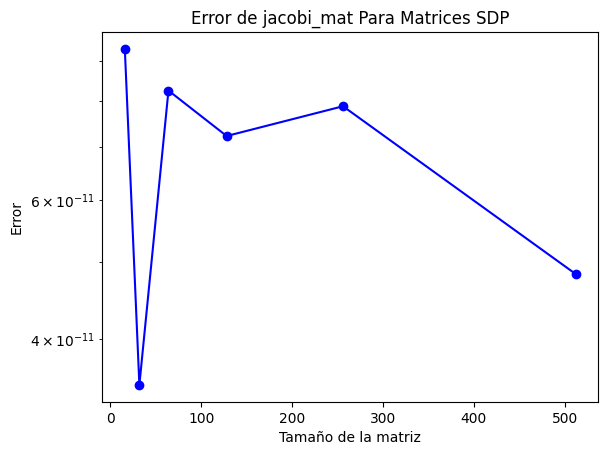

In [25]:
method = JACOBI_MAT
n = 8
info = {}
salidas = []
for i in range(6):
    np.random.seed(48564)
    A = generate_strictly_diagonal_dominant_matrix(n)
    x_real = np.random.rand(n)
    b = np.matmul(A, x_real)
    print(x_real)
    entrada_writer(A, b, x_real)
    tiempos = []
    print(f"Corriendo {method} con n={n}")
    run(method=method, iter=1000)
    salida = np.array(salida_reader())
    salidas.append(salida)
    print(salida)
    err = np.linalg.norm((x_real - salida),2)
    n = n*2
    info[n] = err
    
mat_size = info.keys()
errors = [info[i] for i in info.keys()]
print(mat_size)
print(errors)
plt.plot(mat_size, errors, '-bo')
plt.xlabel("Tamaño de la matriz")
plt.ylabel("Error")
plt.yscale("log")
plt.title(f"Error de {method.split('/')[-1]} Para Matrices SDP")
plt.show()

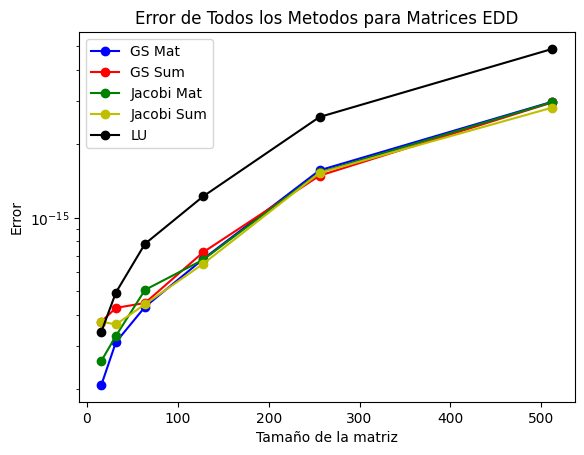

In [28]:
gs_mat = [2.0770370905276122e-16, 3.1033616334793183e-16, 4.325726995834463e-16, 6.780307399634662e-16, 1.5610930677947572e-15, 2.974443925506699e-15]
gs_sum = [3.764949453935611e-16, 4.2841699744536696e-16, 4.485929168680233e-16, 7.228007291358707e-16, 1.4845260392589983e-15, 2.955271497378816e-15]
jacobi_mat = [2.603703785810335e-16, 3.2930516687588397e-16, 5.072664850922297e-16, 6.738235469827297e-16, 1.5302188407251776e-15, 2.963426265859385e-15]
jacobi_sum = [3.764949453935611e-16, 3.665319231433493e-16, 4.4332283078321286e-16, 6.480678254685652e-16, 1.523893111657006e-15, 2.8146598048381185e-15]
lu = [3.4219371797089426e-16, 4.949771338661628e-16, 7.823833656862623e-16, 1.2220330446940418e-15, 2.576680494630722e-15, 4.8854994340279154e-15]
x = [16, 32, 64, 128, 256, 512]
plt.plot(x, gs_mat, '-bo')
plt.plot(x, gs_sum, '-ro')
plt.plot(x, jacobi_mat, '-go')
plt.plot(x, jacobi_sum, '-yo')
plt.plot(x, lu, '-ko')
plt.xlabel("Tamaño de la matriz")
plt.ylabel("Error")
plt.yscale("log")
plt.legend(["GS Mat", "GS Sum", "Jacobi Mat", "Jacobi Sum", "LU"])
plt.title(f"Error de Todos los Metodos para Matrices EDD")
plt.show()

ERROR PARA MATRICES DE HILBERT VS METODO DIRECTO

[0.27351584 0.63520628 0.6121068  0.15152739 0.05747235 0.16792389
 0.1805449  0.19786414]
Corriendo ../src/gs_mat con n=8
iteración 0
iteración 1
iteración 2
iteración 3
iteración 4
iteración 5
iteración 6
iteración 7
iteración 8
iteración 9
iteración 10
iteración 11
iteración 12
iteración 13
iteración 14
iteración 15
iteración 16
iteración 17
iteración 18
iteración 19
iteración 20
iteración 21
iteración 22
iteración 23
iteración 24
iteración 25
iteración 26
iteración 27
iteración 28
iteración 29
iteración 30
iteración 31
iteración 32
iteración 33
iteración 34
iteración 35
iteración 36
iteración 37
iteración 38
iteración 39
iteración 40
iteración 41
iteración 42
iteración 43
iteración 44
iteración 45
iteración 46
iteración 47
iteración 48
iteración 49
iteración 50
iteración 51
iteración 52
iteración 53
iteración 54
iteración 55
iteración 56
iteración 57
iteración 58
iteración 59
iteración 60
iteración 61
iteración 62
iteración 63
iteración 64
iteración 65
iteración 66
iteración 67
ite

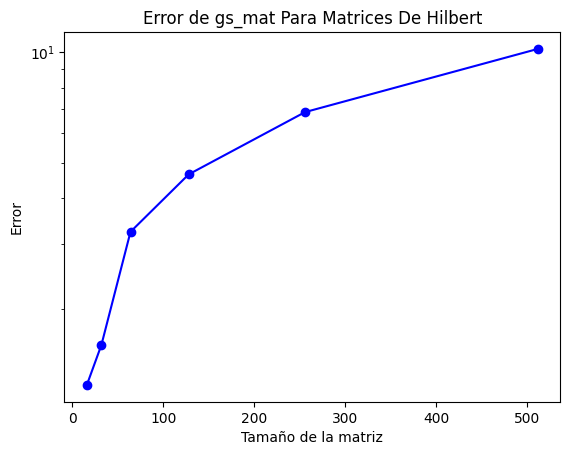

In [10]:
method = GS_MAT
n = 8
info = {}
for i in range(6):
    np.random.seed(48564)
    A = generate_hilberts_matrix(n)
    x_real = np.random.rand(n)
    b = np.matmul(A, x_real)
    print(x_real)
    entrada_writer(A, b, x_real)
    tiempos = []
    print(f"Corriendo {method} con n={n}")
    run(method=method, iter=1000)
    salida = np.array(salida_reader())
    print(salida)
    err = np.linalg.norm((x_real - salida),2)
    n = n*2
    info[n] = err

print(info)
mat_size = info.keys()
errors = [info[i] for i in info.keys()]
print(mat_size)
print(errors)
plt.plot(mat_size, errors, '-bo')
plt.xlabel("Tamaño de la matriz")
plt.ylabel("Error")
plt.yscale("log")
plt.title(f"Error de {method.split('/')[-1]} Para Matrices De Hilbert")
plt.show()

In [ ]:
mat_size = [16, 32, 64, 128, 256, 512]
gs_sum_H = [1.2425304500876395, 1.5961786174061774, 3.2411870886609524, 4.644485321708521, 6.8591735292469425, 10.18873161603774]
gs_mat_H = [1.2425304500876395, 1.5961786174061774, 3.2411870886609524, 4.644485321708521, 6.8591735292469425, 10.18873161603774]
LU_solver = [5.811420540566547e-07, 26.53707379667494, 85.99166244538573, 156.15611737956132, 404.0345614673756, 5840.866953888222]
plt.plot(mat_size, gs_sum_H, '-bo')
plt.plot(mat_size, gs_mat_H, '-ro')
plt.plot(mat_size, LU_solver, '-go')
plt.xlabel("Tamaño de la matriz")
plt.ylabel("Error")
plt.yscale("log")
plt.title(f"Comparación de Error Para Matrices de Hilbert")
plt.legend(["GS Sum", "GS Mat", "LU Solver"])
plt.show()


ANALISIS DE CONVERGENCIA - DISTINTOS X0 - CONVERGENCIA

In [9]:
methods = [GS_MAT, JACOBI_MAT]
np.random.seed(48564)

iteraciones_por_metodo = []
for method in methods:
    n = 8
    iteraciones = []
    for i in range(8):
        A = generate_strictly_diagonal_dominant_matrix(n)
        x_real = np.random.rand(n)
        print(x_real)
        b = np.matmul(A, x_real)
        entrada_writer(A, b, x_real)
        print(f"Corriendo {method} con n={n}")

        run(method=method, iter=500)
        iteraciones.append(iters_reader())
        n = n*2
    iteraciones_por_metodo.append(iteraciones)

gs_iter = iteraciones_por_metodo[0]
jacobi_iter = iteraciones_por_metodo[1]

[0.41578998 0.43486982 0.31301691 0.3319486  0.72214143 0.17679125
 0.66472987 0.35105185]
Corriendo ../src/gs_mat con n=8
iteración 0
iteración 1
iteración 2
iteración 3
iteración 4
iteración 5
iteración 6
iteración 7
iteración 8
iteración 9
iteración 10
iteración 11
iteración 12
iteración 13
iteración 14
iteración 15
iteración 16
iteración 17
iteración 18
iteración 19
[0.34447623 0.13329893 0.2343162  0.55729162 0.35482028 0.02334333
 0.90129461 0.27975746 0.57883872 0.36617073 0.02440957 0.44213313
 0.90859055 0.56085099 0.7114509  0.52888791]
Corriendo ../src/gs_mat con n=16
iteración 0
iteración 1
iteración 2
iteración 3
iteración 4
iteración 5
iteración 6
iteración 7
iteración 8
iteración 9
iteración 10
iteración 11
iteración 12
iteración 13
iteración 14
iteración 15
iteración 16
[0.54999858 0.31294544 0.11723325 0.01526575 0.56882434 0.48630129
 0.99955775 0.32928892 0.92366952 0.54483891 0.20914825 0.94236196
 0.02138503 0.99179458 0.43065501 0.4723824  0.88518959 0.09796917
 0

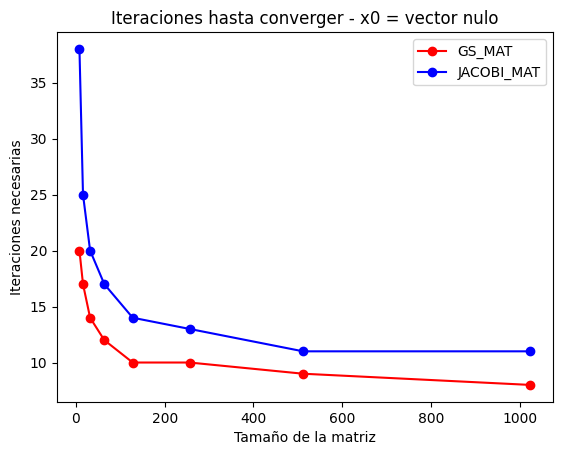

In [10]:
# Grafico de iteraciones hasta converger para distintos x0 (hay que cambiar el x0 en el codigo) - Escala lineal
# Solo GS y Jacobi en forma matricial (sumatorias tardan mismas iteraciones)

mat_size = [8, 16, 32, 64, 128, 256, 512, 1024]
plt.errorbar(mat_size, gs_iter, fmt='-ro')
plt.errorbar(mat_size, jacobi_iter, fmt='-bo')

plt.legend(["GS_MAT", "JACOBI_MAT"])
plt.xlabel("Tamaño de la matriz")
plt.ylabel("Iteraciones necesarias")
plt.title("Iteraciones hasta converger - x0 = vector nulo")
plt.show()


EVOLUCION DEL ERROR - DISTINTOS X0 - MATRICES 500x500 

In [38]:
methods = [GS_MAT, JACOBI_MAT]
np.random.seed(48564)

n = 500
iteraciones = []
errores = []

for method in methods:
    A = generate_strictly_diagonal_dominant_matrix(n)
    x_real = np.random.rand(n)
    b = np.matmul(A, x_real)
    entrada_writer(A, b, x_real)
    print(f"Corriendo {method} con n={n}")
    run(method=method, iter=500)
    iteraciones.append(iters_reader())
    error = errores_reader()
    errores.append(error)

gs_iter = np.arange(1, iteraciones[0] - 1)
gs_error = errores[0]

jacobi_iter = np.arange(1, iteraciones[1] - 1)
jacobi_error = errores[1]

Corriendo ../src/gs_mat con n=500
iteración 0
iteración 1
iteración 2
iteración 3
iteración 4
iteración 5
iteración 6
iteración 7
iteración 8
Corriendo ../src/jacobi_mat con n=500
iteración 0
iteración 1
iteración 2
iteración 3
iteración 4
iteración 5
iteración 6
iteración 7
iteración 8
iteración 9
iteración 10
iteración 11


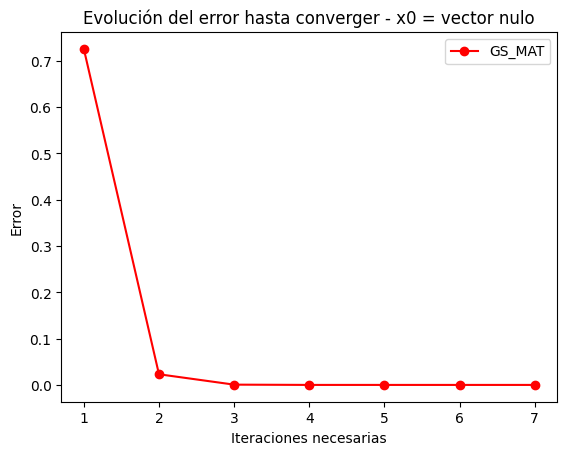

In [40]:
# Grafico de evolución del error hasta converger para distintos x0 (hay que cambiar el x0 en el codigo) - Escala lineal


plt.errorbar(gs_iter, gs_error, fmt='-ro')
#plt.errorbar(jacobi_error, jacobi_iter, fmt='-bo')

plt.legend(["GS_MAT", "JACOBI_MAT"])
plt.ylabel("Error")
plt.xlabel("Iteraciones necesarias")
plt.title("Evolución del error hasta converger - x0 = vector nulo")
plt.show()


EVOLUCION DEL ERROR - DISTINTAS MATRICES - (VARIANDO NUMERO DE CONDICION) 

In [ ]:
methods = [GS_MAT, JACOBI_MAT]
np.random.seed(48564)

n = 500
iteraciones = []
errores = []

for method in methods:
    A = generate_strictly_diagonal_dominant_matrix(n)
    x_real = np.random.rand(n)
    b = np.matmul(A, x_real)
    entrada_writer(A, b, x_real)
    print(f"Corriendo {method} con n={n}")
    run(method=method, iter=500)
    iteraciones.append(iters_reader())
    error = errores_reader()
    errores.append(error)

gs_iter = np.arange(1, iteraciones[0] - 1)
gs_error = errores[0]

jacobi_iter = np.arange(1, iteraciones[1] - 1)
jacobi_error = errores[1]

In [ ]:
# Grafico de evolución del error hasta converger para distintas matrices (variando numero condicion) - Escala lineal


plt.errorbar(gs_iter, gs_error, fmt='-ro')
#plt.errorbar(jacobi_error, jacobi_iter, fmt='-bo')

plt.legend(["GS_MAT", "JACOBI_MAT"])
plt.ylabel("Error")
plt.xlabel("Iteraciones necesarias")
plt.title("Evolución del error hasta converger - x0 = vector nulo")
plt.show()
